If you have the ERA5 data, wave analysis file, and model data collected in one directory and named as in All_figs_data_setup.ipynb, this notebook should be able to replicate Figure 1 in Bartusek et al., 2022, _Nat. Clim. Change_.

Sam Bartusek, 2021

## _Data setup notebook (~15 min)_

In [1]:
%run ./All_figs_data_setup.ipynb


/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[                                        ] | 0% Completed |  2.1s

/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  5min  3.2s


./All_figs_data_setup.ipynb:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cell_type": "markdown",


## _1a–c)_

/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/opt/anaconda3/envs/pangeoxtdai36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


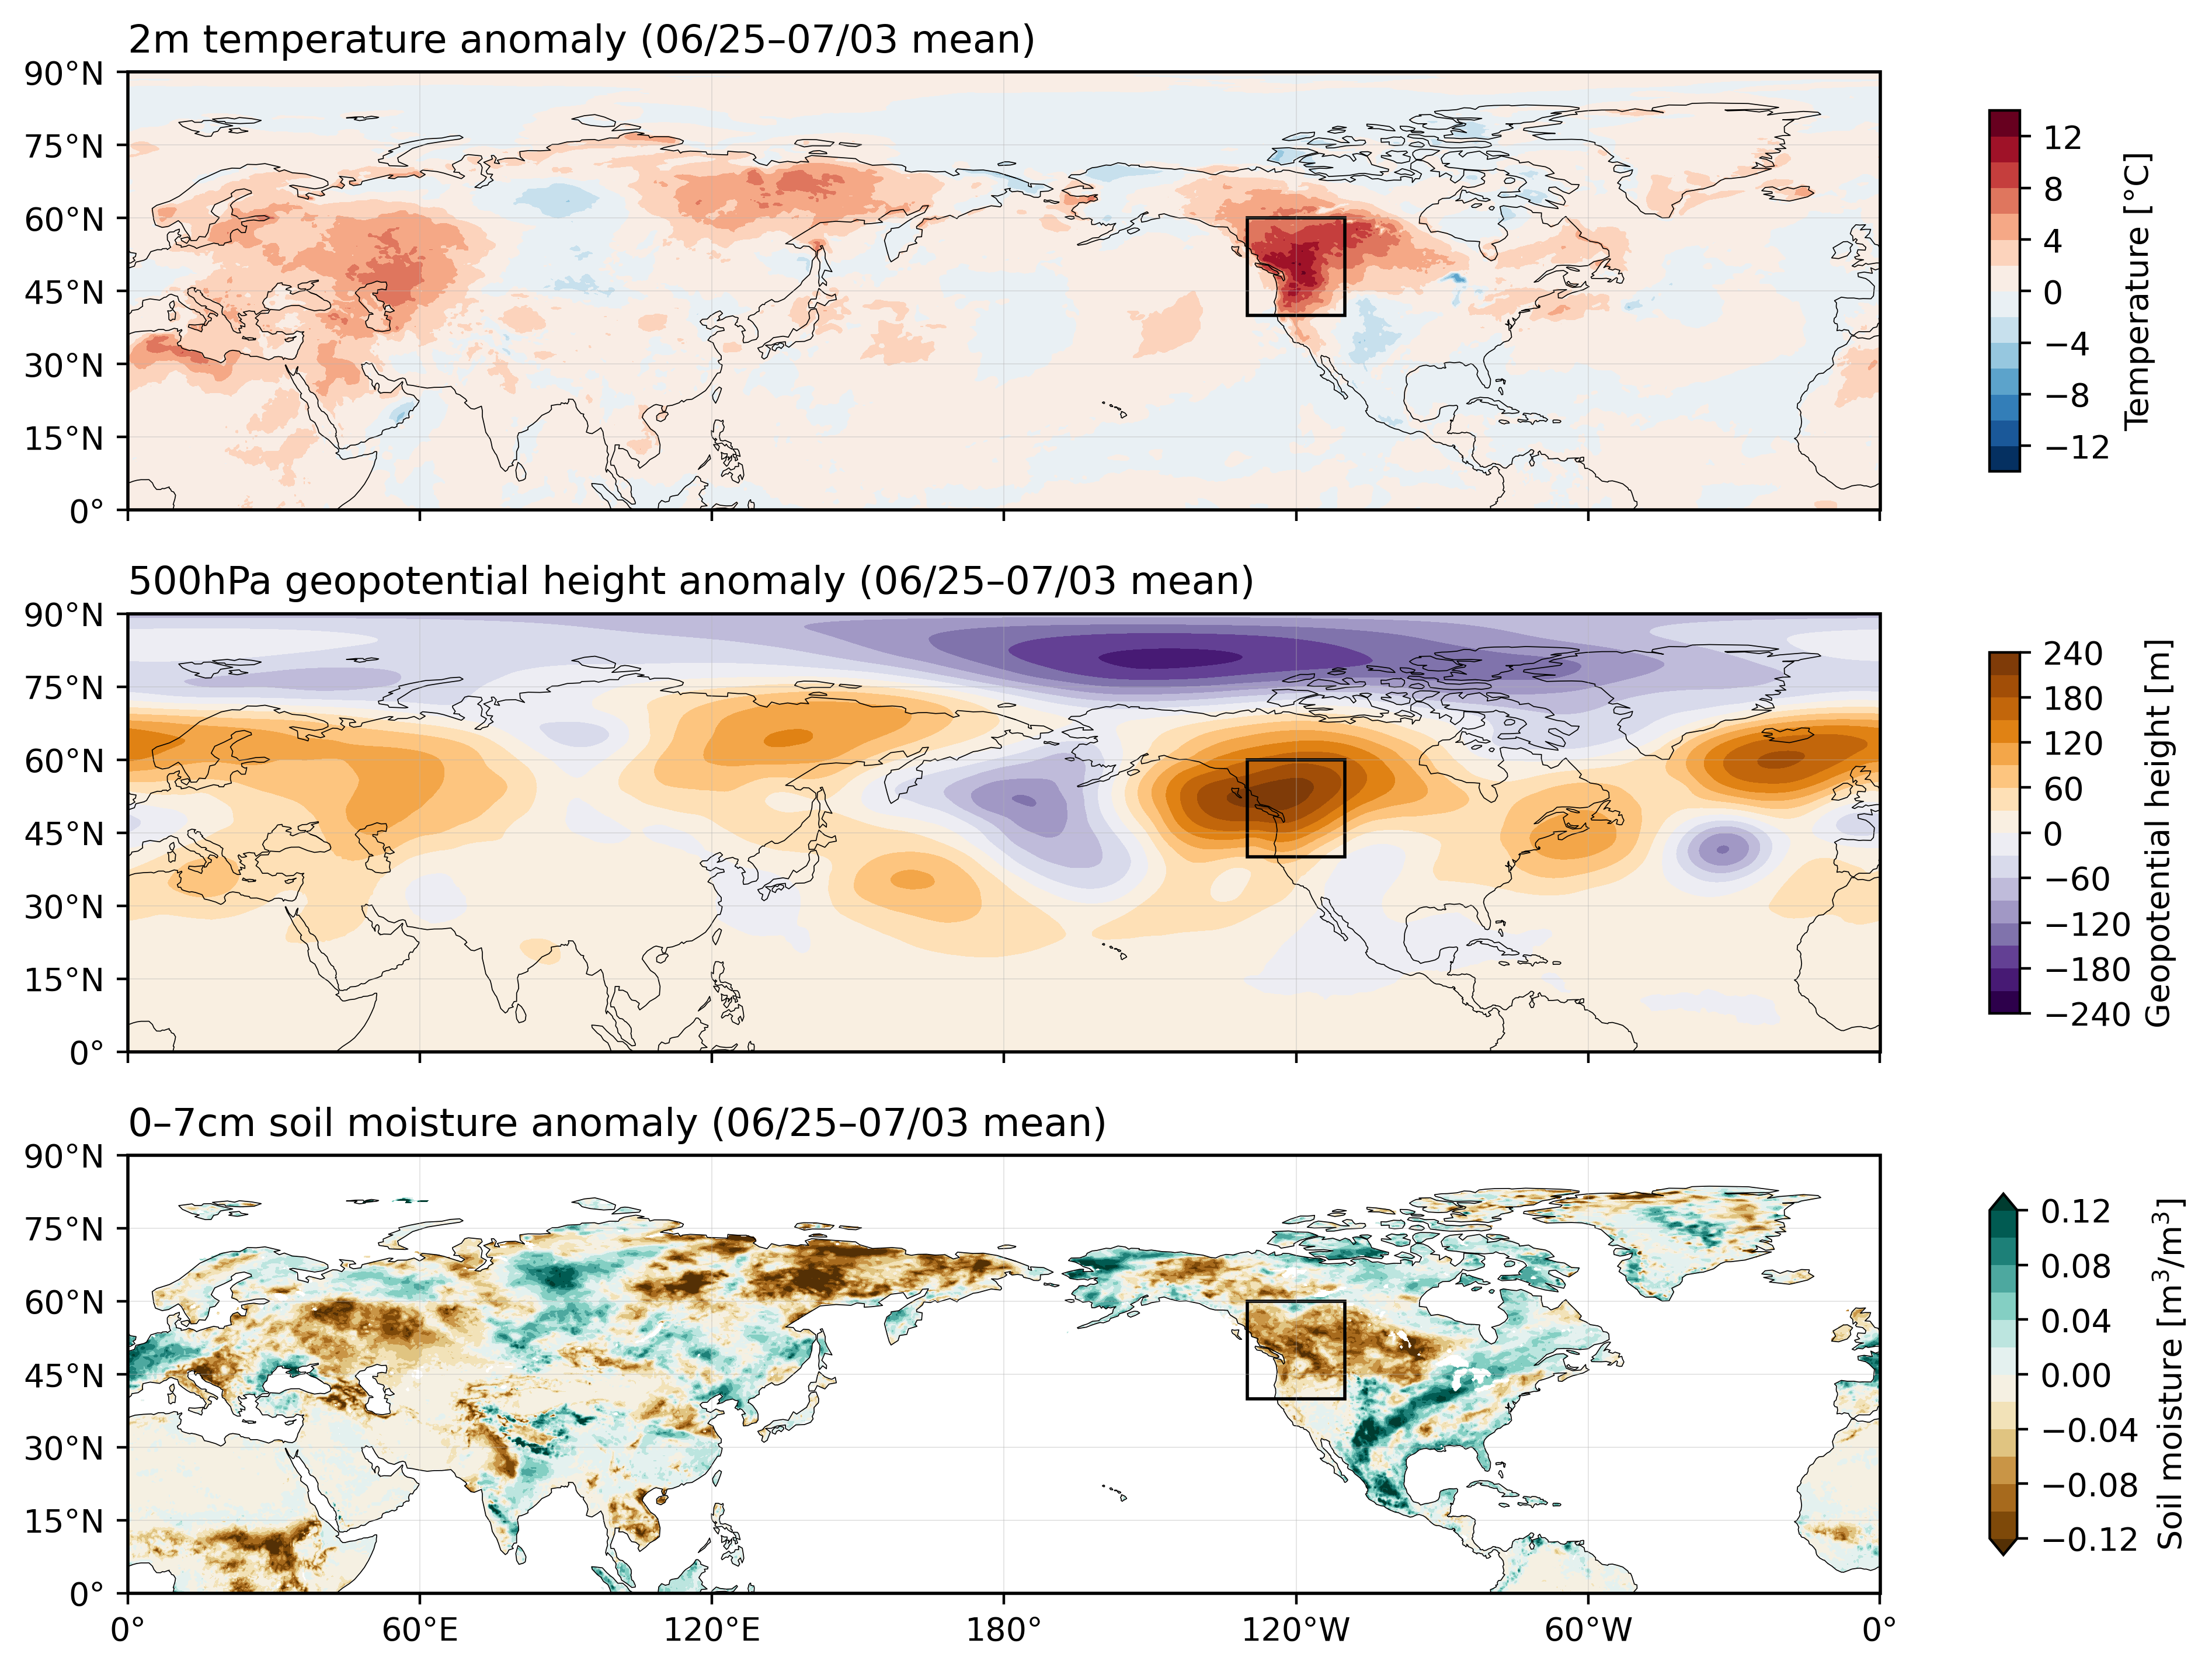

In [13]:
# Prepare data for plotting

qqs = [anomslice.t2m,
       anomslice.z,
       anomslice.swvl1]


# Plot

titles = ['2m temperature anomaly (06/25–07/03 mean)',
          '500hPa geopotential height anomaly (06/25–07/03 mean)',
          '0–7cm soil moisture anomaly (06/25–07/03 mean)']
cbar_labels = ['Temperature [°C]',
               'Geopotential height [m]',
               'Soil moisture [m$^{3}$/m$^{3}$]']
cmaps = ['RdBu_r',
         'PuOr_r',
         'BrBG']
robusts = [False,
           False,
           True]
yticks = [0, 15, 30, 45, 60, 75, 90]
xticks = [0, 60, 120, 180, 240, 300, 359.9]
xticklabels = ['0°', '60°E', '120°E', '180°', '120°W', '60°W', '0°']

fig,axs = plt.subplots(len(qqs),1,subplot_kw={'projection': ccrs.PlateCarree(180)},dpi=200,figsize=(12.1,2.9*len(qqs)),sharex=True)
for ii,qq in enumerate(qqs):
    ax = axs.reshape(-1)[ii]
    cyclic_dataarray(qq).plot.contourf(levels=16,ax=ax,transform=ccrs.PlateCarree(),robust=robusts[ii],cmap=cmaps[ii],cbar_kwargs={'shrink':.8,'aspect':12,'label':cbar_labels[ii]})
    ax.set_global()
    ax.coastlines(color='0', linewidth=.3)
    ax.gridlines(draw_labels = False, xlocs=xticks, ylocs=yticks, color='.7', alpha=0.4, linewidth=.3)
    ax.add_patch(matplotlib.patches.Rectangle(xy=[-130, 40], width=20, height=20,facecolor='none',edgecolor='0',alpha=1,transform=ccrs.PlateCarree()))
    ax.set_ylim(0,90)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(titles[ii],loc='left')


## _1d)_

Text(0.0, 1.0, 'Standardized anomalies throughout June 2021')

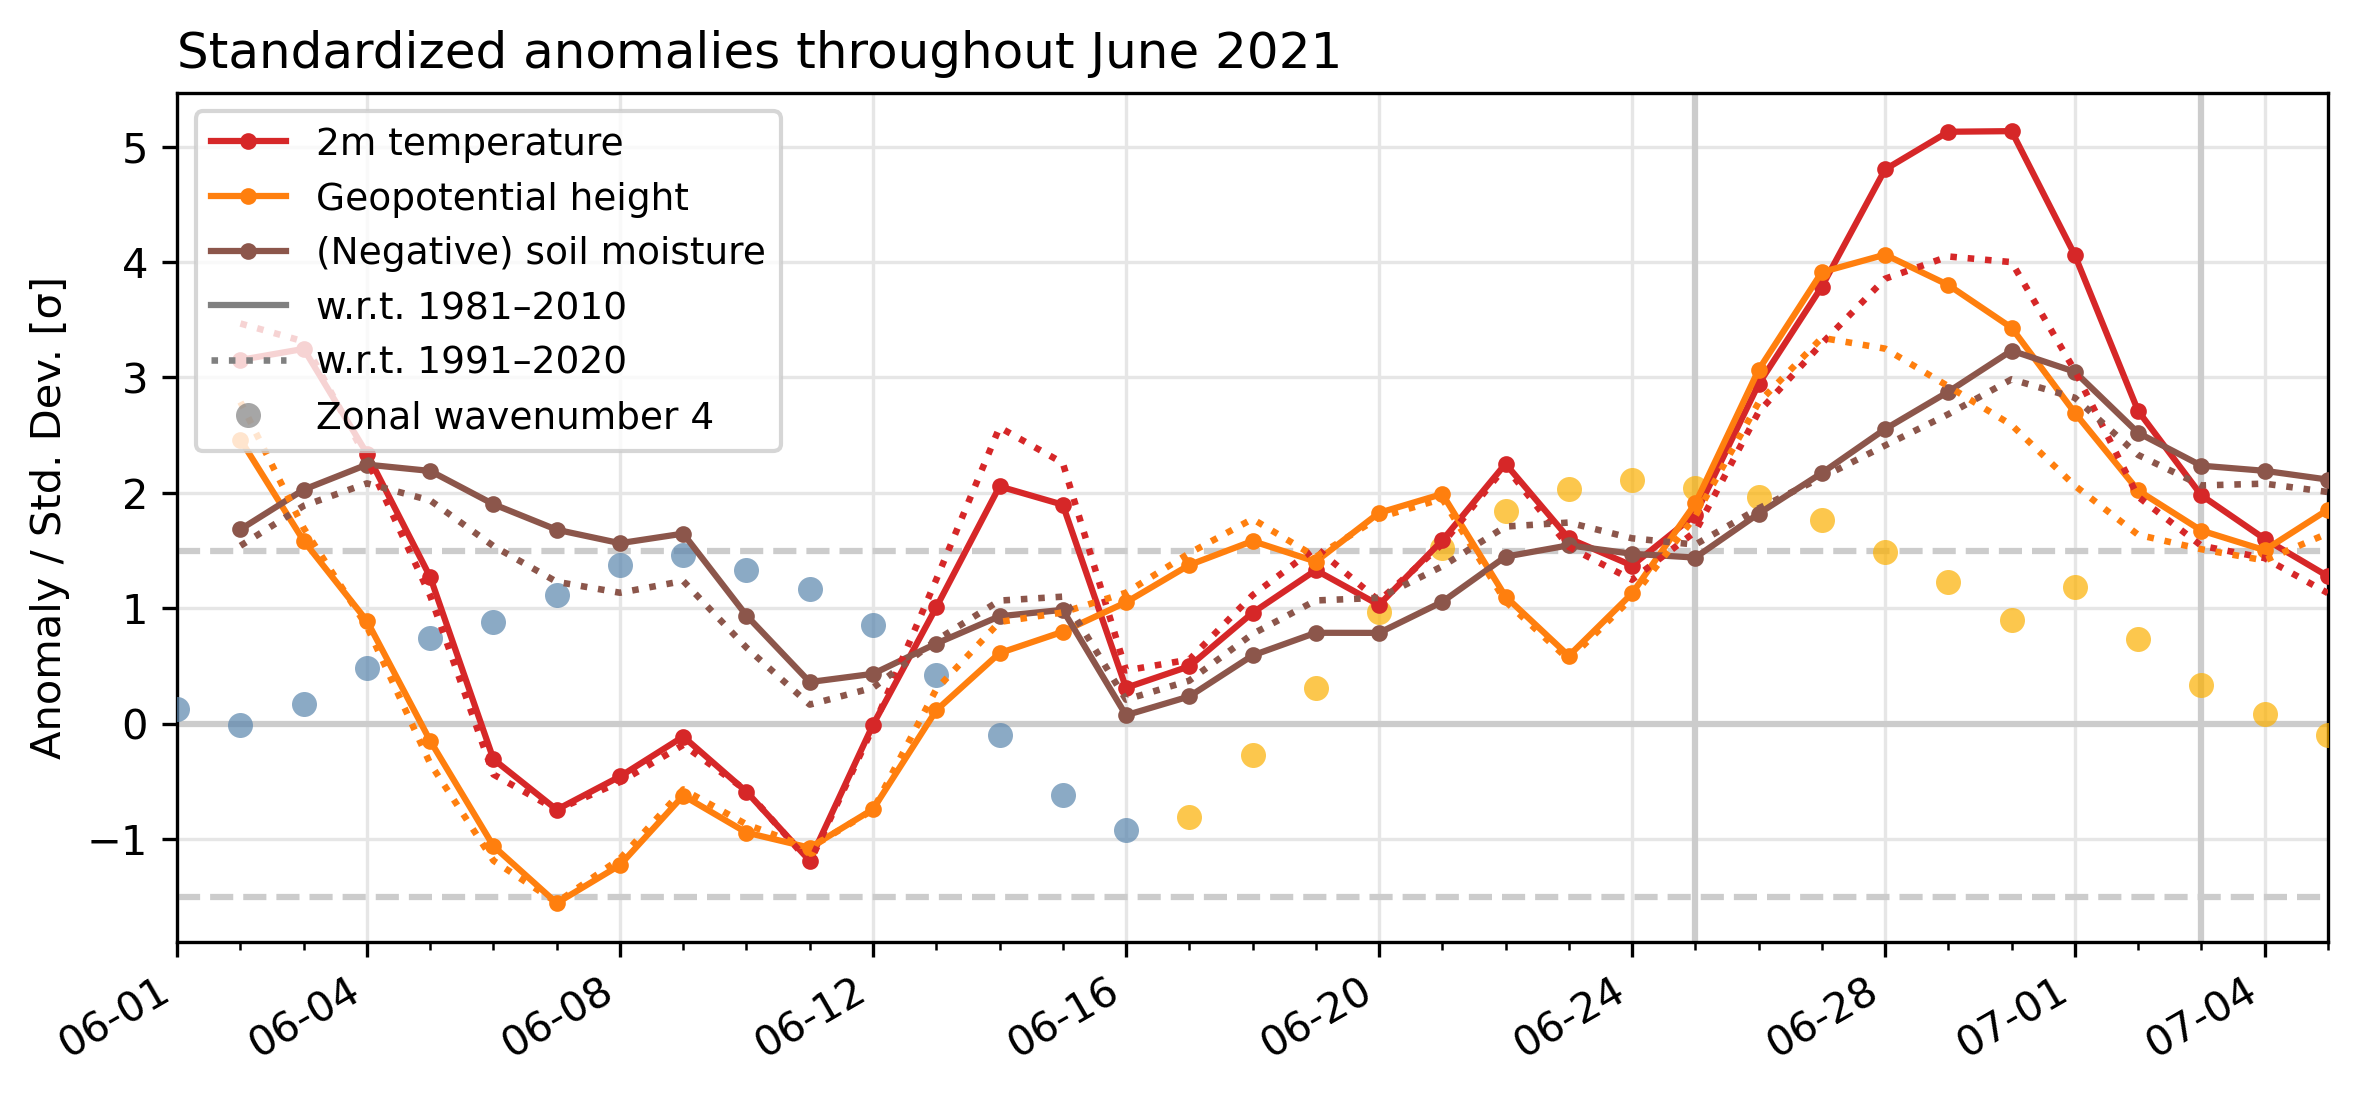

In [2]:
# Prepare data for plotting

asmoothing = 3  # anomaly smoothing
ssmoothing = 3  # std dev smoothing
qqs = [((raw_pnw_mean.t2mland.resample(time='1D').mean('time') - allraw_df.loc['1981':'2010'].groupby('day').mean().loc['06-01':'07-06'].t2mland.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1981':'2010'].groupby('day').std().loc['06-01':'07-06'].t2mland.rolling(ssmoothing,center=True).mean().values),
      ((raw_pnw_mean.z.resample(time='1D').mean('time') - allraw_df.loc['1981':'2010'].groupby('day').mean().loc['06-01':'07-06'].z.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1981':'2010'].groupby('day').std().loc['06-01':'07-06'].z.rolling(ssmoothing,center=True).mean().values),
      (-(raw_pnw_mean.swvl1.resample(time='1D').mean('time') - allraw_df.loc['1981':'2010'].groupby('day').mean().loc['06-01':'07-06'].swvl1.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1981':'2010'].groupby('day').std().loc['06-01':'07-06'].swvl1.rolling(ssmoothing,center=True).mean().values),
      ((raw_pnw_mean.t2mland.resample(time='1D').mean('time') - allraw_df.loc['1991':'2020'].groupby('day').mean().loc['06-01':'07-06'].t2mland.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1991':'2020'].groupby('day').std().loc['06-01':'07-06'].t2mland.rolling(ssmoothing,center=True).mean().values),
      ((raw_pnw_mean.z.resample(time='1D').mean('time') - allraw_df.loc['1991':'2020'].groupby('day').mean().loc['06-01':'07-06'].z.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1991':'2020'].groupby('day').std().loc['06-01':'07-06'].z.rolling(ssmoothing,center=True).mean().values),
      (-(raw_pnw_mean.swvl1.resample(time='1D').mean('time') - allraw_df.loc['1991':'2020'].groupby('day').mean().loc['06-01':'07-06'].swvl1.rolling(asmoothing,center=True).mean().values) / allraw_df.loc['1991':'2020'].groupby('day').std().loc['06-01':'07-06'].swvl1.rolling(ssmoothing,center=True).mean().values),
      waves[(waves.wave==4) & (waves.phase>0)].amp_std,
      waves[(waves.wave==4) & (waves.phase<=0)].amp_std]


# Plot

fig,ax = plt.subplots(1,1,dpi=150,figsize=(10*.925,4.5*.925))
ax.axhline(0,c='.8')

qqs[0].plot(ax=ax,marker='.',label='2m temperature',color='tab:red',zorder=4)
qqs[1].plot(ax=ax,marker='.',label='Geopotential height',color='tab:orange',zorder=4)
qqs[2].plot(ax=ax,marker='.',label='(Negative) soil moisture',color='tab:brown',zorder=4)
qqs[3].plot(ax=ax,ls=':',lw=1.75*.9,label='',color='tab:red',zorder=4)
qqs[4].plot(ax=ax,ls=':',lw=1.75*.9,label='',color='tab:orange',zorder=4)
qqs[5].plot(ax=ax,ls=':',lw=1.75*.9,label='',color='tab:brown',zorder=4)
ax.plot([],[],ls='-',label='w.r.t. 1981–2010',color='.5')
ax.plot([],[],ls=':',lw=1.75*.9,label='w.r.t. 1991–2020',color='.5')
qqs[6].plot(ax=ax,ls='none',marker='o',markeredgecolor='none',lw=3*.9,alpha=.7,label='',color='xkcd:dusty blue',zorder=3)
qqs[7].plot(ax=ax,ls='none',marker='o',markeredgecolor='none',lw=3*.9,alpha=.7,label='',color='xkcd:yellow orange',zorder=3)
ax.plot([],[],ls='none',marker='o',markeredgecolor='none',lw=3*.9,alpha=.7,label='Zonal wavenumber 4',color='.5')

ax.set_xlim('2021-06-01','2021-07-05')
ax.set_xticks(['2021-06-01','2021-06-04','2021-06-08','2021-06-12','2021-06-16','2021-06-20','2021-06-24','2021-06-28','2021-07-01','2021-07-04'])
ax.set_xticklabels(['06-01','06-04','06-08','06-12','06-16','06-20','06-24','06-28','07-01','07-04'])
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.grid(c='.9')
ax.axvline('2021-06-25',c='.8',zorder=2)
ax.axvline('2021-07-03',c='.8',zorder=2)
ax.axhline(1.5,c='.8',ls='--',zorder=2)
ax.axhline(-1.5,c='.8',ls='--',zorder=2)
ax.set_ylabel('Anomaly / Std. Dev. [σ]')
ax.set_xlabel('')
ax.legend(loc='upper left',fontsize=9)
ax.set_title('Standardized anomalies throughout June 2021',loc='left')
